## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_frames = [mouse_metadata, study_results]
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
print("The Duplicate Mice & Timepoints are:")
print(duplicate_mice)

The Duplicate Mice & Timepoints are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = clean_df['Mouse ID'].nunique()
unique_mice2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tum_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tum_med = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tum_var = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tum_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
tum_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()



stat_df = pd.DataFrame({
    "Mean": tum_mean,
    "Median": tum_med,
    "Variacne": tum_var,
    "Standard Deviation": tum_std,
    "SEM": tum_sem,
})

stat_df


,Mean,Median,Variacne,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

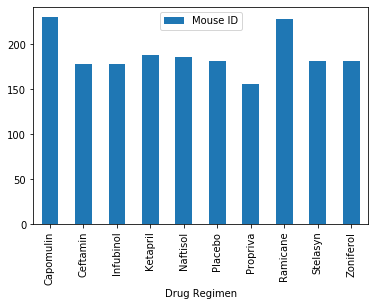

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

clean_df_bar = clean_df.groupby(['Drug Regimen']).agg({'Mouse ID':'count'})
clean_df_bar.plot.bar(rot=90)


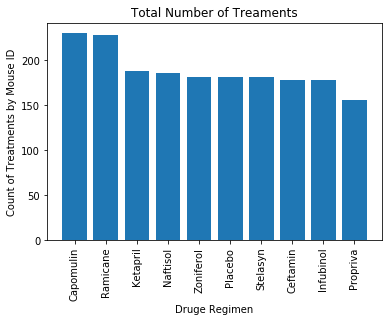

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_testing = clean_df["Drug Regimen"].value_counts()
plt.bar(mice_testing.index, mice_testing)
plt.title("Total Number of Treaments")
plt.ylabel("Count of Treatments by Mouse ID")
plt.xlabel("Druge Regimen")
plt.xticks(rotation=90);


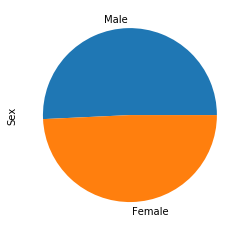

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df["Sex"].value_counts().plot.pie()

Text(0, 0.5, 'Testing Gender Breakdown')

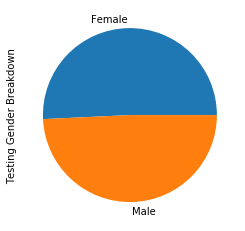

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df["Sex"].value_counts()
plt.pie(gender, labels={"Male", "Female"})
plt.ylabel("Testing Gender Breakdown")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = filter_df.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint = final_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
filter_final = final_timepoint.merge(filter_df, on=["Mouse ID", "Timepoint"], how='left')
filter_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin',]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = filter_final.loc[filter_final['Drug Regimen'] == i, "Tumor Volume (mm3)"]
    
    # add subset 
    vol_data.append(final_volume)
    #print(vol_data)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = final_volume.quantile([.25,.5,.75])
    low_q = quartiles[0.25]
    up_q = quartiles[0.75]
    mid_q = up_q - low_q
    low_bound = low_q - (1.5*mid_q)
    up_bound = up_q - (1.5*mid_q)
    outliers = final_volume.loc[(final_volume<low_bound)|(final_volume>up_bound)]
    print(f"{i} outliers {outliers}")
    
    

Capomulin outliers 9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
53    33.329098
64    46.539206
65    32.377357
68    41.581521
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers 0     67.973419
1     65.525743
6     57.031862
8     66.083066
14    72.226731
15    36.321346
18    60.969711
20    62.43540

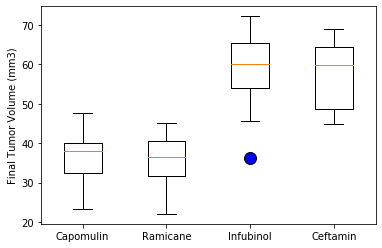

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plt=dict(markerfacecolor="blue", markersize=12)
plt.boxplot(vol_data, labels=drug_list, flierprops=box_plt)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

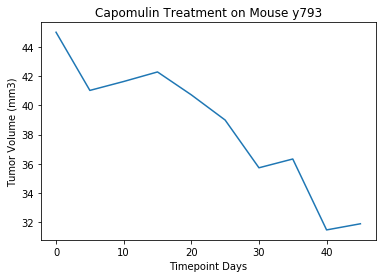

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_data = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
#cap_data
single_mouse = cap_data.loc[cap_data["Mouse ID"] == 'y793']
#single_mouse

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment on Mouse y793')
plt.show()

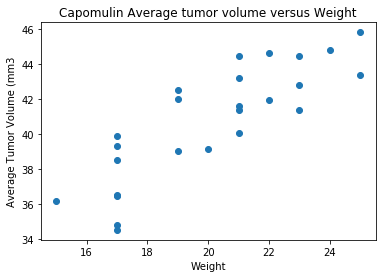

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mean = cap_data.groupby(['Mouse ID']).mean()
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Capomulin Average tumor volume versus Weight')
plt.show()

## Correlation and Regression

 Mouse Weight and Tumor Volume correlation is 0.84


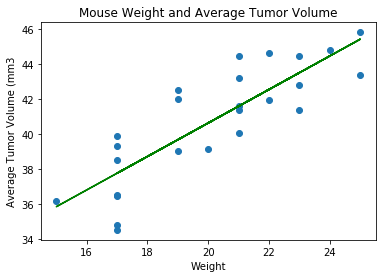

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor = round(st.pearsonr(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])[0],2)
lin_reg = st.linregress(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
y_val =cap_mean['Weight (g)'] * lin_reg[0] + lin_reg[1]
print(f" Mouse Weight and Tumor Volume correlation is {cor}")
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
plt.plot(cap_mean['Weight (g)'], y_val, color="green")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Mouse Weight and Average Tumor Volume')
plt.show()